## 最小二乗法について

[Pythonで最小二乗法をしてみよう](https://qiita.com/NNNiNiNNN/items/4fd5367f9ead6e5905a9)

pyファイルとして作成してimportするようにする

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.array([1,2,4,6,7])
y = np.array([1,3,3,5,4])

In [7]:
def reg1dim(x,y):
    n = len(x)
    a = ((np.dot(x,y) - y.sum() * x.sum()/n)/
        ((x**2).sum() - x.sum()**2 / n))
    
    b = (y.sum() - a * x.sum())/n
    return a,b

a,b = reg1dim(x,y)

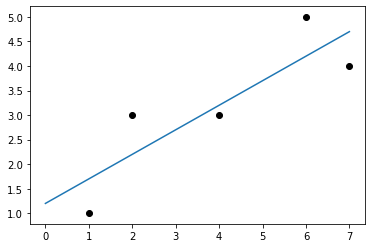

In [17]:
plt.scatter(x,y,color="k")
plt.plot([0, x.max()], [b, a* x.max() + b]) #(0,b)地点から(xの最大値, ax + b)地点までの線
plt.show()

### y = ax + b型関数への近似

In [18]:
np.dot(x,y)

77

In [28]:
print('xのスカラー:{}'.format(x.sum()))
print('yのスカラー:{}'.format(y.sum()))
print('x*y:{}'.format(y.sum() * x.sum()))
print('重みa:{}'.format(a))
print('バイアスb:{}'.format(b))

xのスカラー:20
yのスカラー:16
x*y:320
重みa:0.5
バイアスb:1.2


In [29]:
xx = np.array([1,2,3,4])
yy = np.array([0,-1,-2,-3])

In [33]:
aa,bb = reg1dim(xx,yy)
print('重みaa:{}'.format(aa))
print('バイアスbb:{}'.format(bb))

重みaa:-1.0
バイアスbb:1.0


In [ ]:
def reg1dim_update(x,y):
    n = len(x)
    
    a = ((np.dot(x,y) - y.sum() * x.sum()/n)/
        ((x**2).sum() - x.sum()**2 / n))
    
    b = (y.sum() - a * x.sum())/n
    return a,b

a,b = reg1dim(x,y)

In [36]:
def reg1dim_update(x,y,a,b,lr):
    n = len(x)
    del_a = ((np.dot(x,y) - y.sum() * x.sum()/n)/
        ((x**2).sum() - x.sum()**2 / n))
    del_b = (y.sum() - a * x.sum())/n
    
    #活性化関数ーー”！！！
    
    a += lr * del_a
    b += lr * del_b
    return a,b

a,b = reg1dim(x,y)

In [49]:
a = 0.1
b = 0.2

In [50]:
for i in range(1000):
    aa,bb = reg1dim_update(x,y,aa,bb,0.05)
    if i % 100 == 0:
        print('{0}回目重み:{1}'.format(i,aa))
        print('{0}回目バイアス:{1}'.format(i,bb))

0回目重み:0.15
0回目バイアス:0.475
100回目重み:2.6499999999999946
100回目バイアス:-11.274999999999968
200回目重み:5.150000000000006
200回目バイアス:-73.02499999999985
300回目重み:7.650000000000041
300回目バイアス:-184.77500000000032
400回目重み:10.150000000000077
400回目バイアス:-346.52500000000146
500回目重み:12.650000000000112
500回目バイアス:-558.2750000000035
600回目重み:15.150000000000148
600回目バイアス:-820.025000000006
700回目重み:17.650000000000066
700回目バイアス:-1131.7750000000085
800回目重み:20.149999999999924
800回目バイアス:-1493.5250000000087
900回目重み:22.649999999999782
900回目バイアス:-1905.275000000006


In [51]:
# y = w[0] + w[1]x[1] + w[2]x[2]型。
#今回はw = [1, 2, 3]とする。
X = np.random.random((100, 2)) * 10 # 0から1*10の範囲をとる100*2の行列
y = 1 + 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100)
#x0とx1の座標からyを作成。randnで本来の値にノイズを加えている。

In [54]:
len(X)

100

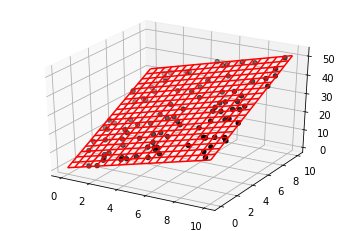

In [59]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d # 3D表示に使う
from scipy import linalg # linalg.solve(A, b) 　Ax = bの解を求める関数

Xtil = np.c_[np.ones(X.shape[0]), X] # Xの行列の左端に[1,1,1,...,1]^Tを加える。(7)式を確認しよう
A = np.dot(Xtil.T, Xtil) # 標準形A,bに当てはめる。
b = np.dot(Xtil.T, y)
w = linalg.solve(A, b) # (8)式をwについて解く。

xmesh, ymesh = np.meshgrid(np.linspace(0, 10, 20),
                            np.linspace(0, 10, 20))
zmesh = (w[0] + w[1] * xmesh.ravel() +
        w[2] * ymesh.ravel()).reshape(xmesh.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='k')
ax.plot_wireframe(xmesh, ymesh, zmesh, color='r')
plt.show()

In [61]:
print(w)

[0.85445412 2.01790198 2.99099815]
